In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
vendas_df = pd.read_excel('Vendas.xlsx')

In [4]:
vendas_df.shape

(93910, 7)

In [5]:
vendas_df.dtypes

Código Venda               int64
Data              datetime64[ns]
ID Loja                   object
Produto                   object
Quantidade                 int64
Valor Unitário             int64
Valor Final                int64
dtype: object

In [73]:
vendas_df['Produto'].value_counts()

Bermuda Linho       857
Mochila Liso        854
Pulseira Liso       851
Relógio Listrado    847
Cueca               840
                   ... 
Meia Xadrez         736
Gorro Estampa       732
Sunga Estampa       730
Short Listrado      717
Polo Linho          717
Name: Produto, Length: 120, dtype: int64

In [7]:
vendas_df[['Produto', 'ID Loja']]


,Produto,ID Loja
0,Sapato Estampa,Iguatemi Esplanada
1,Camiseta,Iguatemi Esplanada
2,Sapato Xadrez,Iguatemi Esplanada
3,Relógio,Norte Shopping
4,Chinelo Liso,Norte Shopping
...,...,...
93905,Mochila Xadrez,Shopping Vila Velha
93906,Pulseira Listrado,Ribeirão Shopping
93907,Cueca Listrado,Ribeirão Shopping
93908,Pulseira Linho,Shopping Morumbi


In [8]:
# pegar linhas que correspondem a uma condição
vendas_df.loc[vendas_df['ID Loja'] == 'Norte Shopping']

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
8,7,2019-01-02,Norte Shopping,Camisa Gola V Listrado,1,116,116
9,7,2019-01-02,Norte Shopping,Camisa Liso,1,105,105
100,73,2019-01-02,Norte Shopping,Cueca Xadrez,5,60,300
...,...,...,...,...,...,...,...
93716,64888,2019-11-30,Norte Shopping,Polo Xadrez,1,142,142
93754,64914,2019-11-30,Norte Shopping,Calça Liso,1,190,190
93755,64914,2019-11-30,Norte Shopping,Casaco Estampa,2,256,512
93756,64914,2019-11-30,Norte Shopping,Gorro,2,80,160


In [9]:
#Escolhendo apenas algumas colunas de interesse
vendas_df.loc[vendas_df['ID Loja'] == 'Norte Shopping', ["ID Loja", "Produto", "Quantidade"]]

,ID Loja,Produto,Quantidade
3,Norte Shopping,Relógio,3
4,Norte Shopping,Chinelo Liso,1
8,Norte Shopping,Camisa Gola V Listrado,1
9,Norte Shopping,Camisa Liso,1
100,Norte Shopping,Cueca Xadrez,5
...,...,...,...
93716,Norte Shopping,Polo Xadrez,1
93754,Norte Shopping,Calça Liso,1
93755,Norte Shopping,Casaco Estampa,2
93756,Norte Shopping,Gorro,2


In [10]:
#Criando uma coluna nova de comissão adotando que fosse 5% do valor final
vendas_df['Comissão'] = vendas_df['Valor Final'] * 0.05

In [11]:
vendas_df.sample(5)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Comissão
21769,15008,2019-03-20,Shopping União de Osasco,Camisa Linho,2,141,282,14.1
64585,44648,2019-08-19,Iguatemi Campinas,Relógio,1,200,200,10.0
39606,27277,2019-05-22,Salvador Shopping,Polo Estampa,3,138,414,20.7
5627,3832,2019-01-21,Shopping Barra,Polo,3,130,390,19.5
7819,5335,2019-01-29,Novo Shopping Ribeirão Preto,Sunga Linho,2,149,298,14.9


In [14]:
#Verificando se tem dados nulos
vendas_df.isnull().sum()

Código Venda      0
Data              0
ID Loja           0
Produto           0
Quantidade        0
Valor Unitário    0
Valor Final       0
Comissão          0
dtype: int64

In [15]:
#Descobrir quantas transações cada loja fez
transacoes_loja = vendas_df['ID Loja'].value_counts()
transacoes_loja

Shopping Vila Velha                 3935
Norte Shopping                      3924
Palladium Shopping Curitiba         3909
Shopping Center Leste Aricanduva    3863
Bourbon Shopping SP                 3830
Rio Mar Shopping Fortaleza          3824
Novo Shopping Ribeirão Preto        3810
Shopping SP Market                  3808
Iguatemi Campinas                   3793
Shopping Ibirapuera                 3778
Ribeirão Shopping                   3771
Shopping Center Interlagos          3767
Rio Mar Recife                      3733
Shopping Iguatemi Fortaleza         3731
Salvador Shopping                   3728
Iguatemi Esplanada                  3722
Center Shopping Uberlândia          3713
Shopping União de Osasco            3711
Passei das Águas Shopping           3711
Shopping Barra                      3702
Shopping Eldorado                   3698
Shopping Morumbi                    3654
Parque Dom Pedro Shopping           3612
Shopping Recife                     3605
Shopping Midway 

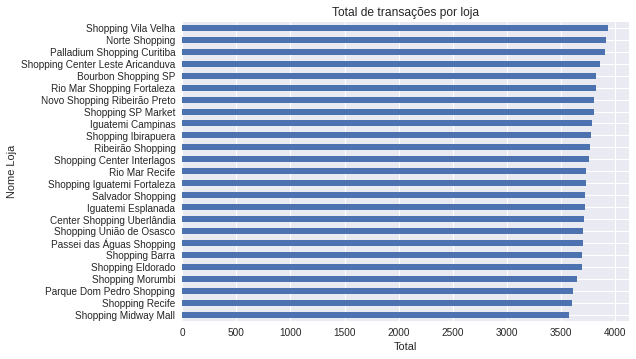

In [26]:
vendas_df.groupby('ID Loja')['ID Loja'].count().sort_values(ascending=True).plot.barh(title='Total de transações por loja')
plt.xlabel('Total')
plt.ylabel('Nome Loja');

In [79]:
faturamento_produto = vendas_df.groupby('Produto')[['Produto', 'Valor Final']].sum().sort_values('Valor Final', ascending=False)
faturamento_produto

,Valor Final
Produto,
Terno Listrado,1215935
Terno Linho,1203000
Terno Liso,1199520
Terno Xadrez,1169850
Terno Estampa,1135954
...,...
Meia Estampa,88400
Meia Xadrez,64944
Meia Liso,62358


In [86]:
faturamento_produto_mes = vendas_df.groupby([vendas_df['Data'].dt.month, 'Produto'])['Valor Final'].sum().reset_index().sort_values('Valor Final', ascending=False)
faturamento_produto_mes

,Data,Produto,Valor Final
1190,10,Terno Linho,156750
833,7,Terno Xadrez,137546
592,5,Terno Listrado,132583
352,3,Terno Listrado,129747
110,1,Terno Linho,128250
...,...,...,...
420,4,Meia,4230
180,2,Meia,3990
544,5,Meia Listrado,3848
900,8,Meia,3750


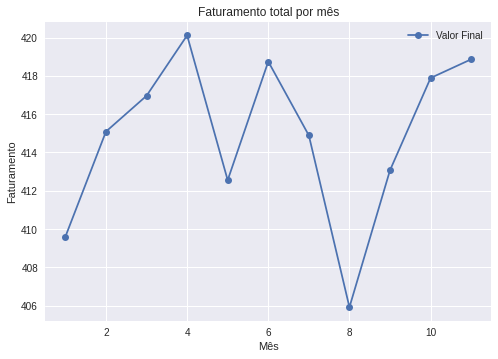

In [56]:
vendas_df.groupby(vendas_df['Data'].dt.month)['Valor Final'].mean().plot(title='Faturamento total por mês', marker='o')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.legend();

In [64]:
vendas_shopping_midway = vendas_df.loc[vendas_df['ID Loja'] == 'Shopping Midway Mall', ['Data', 'Valor Final']]
vendas_shopping_midway

,Data,Valor Final
18,2019-01-02,400
19,2019-01-02,228
42,2019-01-02,100
43,2019-01-02,123
66,2019-01-02,186
...,...,...
93796,2019-11-30,87
93797,2019-11-30,750
93871,2019-11-30,120
93872,2019-11-30,360


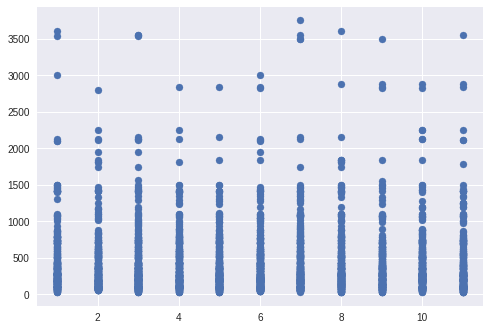

In [67]:
plt.scatter(x= vendas_shopping_midway['Data'].dt.month, y=vendas_shopping_midway['Valor Final'])